# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
firstBase = "http://api.openweathermap.org/geo/1.0/direct?q="
appID = "&limit=5&appid=" + weather_api_key

baseURL = "https://api.openweathermap.org/data/2.5/weather?lat="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    URL = firstBase + city + appID
    response = requests.get(URL).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_url = baseURL + str(response[0]["lat"]) + "&lon=" + str(response[0]["lon"]) + appID
        
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | queenstown
Processing Record 2 of Set 1 | tadine
Processing Record 3 of Set 1 | chonchi
Processing Record 4 of Set 1 | benguela
Processing Record 5 of Set 1 | saddiqabad
City not found. Skipping...
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | vila franca do campo
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | as sulayyil
Processing Record 12 of Set 1 | rio grande
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | nizao
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | ugoofaaru
City not found. Skipping...
Proce

In [4]:
cityName = []
cityLat = []
cityLong = []
cityMax = []
cityHumid = []
cityCloud = []
cityWind = []
cityCountry = []
cityDate = []
for j in range(0, len(city_data)):
    cityName.append(city_data[j]["City"])
    cityLat.append(city_data[j]["Lat"])
    cityLong.append(city_data[j]["Lng"])
    cityMax.append(city_data[j]["Max Temp"])
    cityHumid.append(city_data[j]["Humidity"])
    cityCloud.append(city_data[j]["Cloudiness"])
    cityWind.append(city_data[j]["Wind Speed"])
    cityCountry.append(city_data[j]["Country"])
    cityDate.append(city_data[j]["Date"])



In [5]:
city_data

[{'City': 'queenstown',
  'Lat': -45.0322,
  'Lng': 168.661,
  'Max Temp': 278.41,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 3.92,
  'Country': 'NZ',
  'Date': 1694985168},
 {'City': 'tadine',
  'Lat': -21.5483,
  'Lng': 167.8823,
  'Max Temp': 294.87,
  'Humidity': 85,
  'Cloudiness': 48,
  'Wind Speed': 7.79,
  'Country': 'NC',
  'Date': 1694985169},
 {'City': 'chonchi',
  'Lat': -42.624,
  'Lng': -73.7724,
  'Max Temp': 280.94,
  'Humidity': 71,
  'Cloudiness': 59,
  'Wind Speed': 1.98,
  'Country': 'CL',
  'Date': 1694985170},
 {'City': 'benguela',
  'Lat': -12.579,
  'Lng': 13.4037,
  'Max Temp': 295.36,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind Speed': 0.98,
  'Country': 'AO',
  'Date': 1694985170},
 {'City': 'carnarvon',
  'Lat': -24.8826,
  'Lng': 113.6576,
  'Max Temp': 291,
  'Humidity': 73,
  'Cloudiness': 50,
  'Wind Speed': 9.72,
  'Country': 'AU',
  'Date': 1694985171},
 {'City': 'vila franca do campo',
  'Lat': 37.7172,
  'Lng': -25.4335,
  'Max Temp': 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(
    {
        "City": cityName,
        "Lat": cityLat,
        "Lng": cityLong,
        "Max Temp": cityMax,
        "Humidity": cityHumid,
        "Cloudiness": cityCloud,
        "Wind Speed": cityWind,
        "Country": cityCountry,
        "Date": cityDate
    }
)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,queenstown,-45.0322,168.6610,278.41,95,100,3.92,NZ,1694985168
1,tadine,-21.5483,167.8823,294.87,85,48,7.79,NC,1694985169
2,chonchi,-42.6240,-73.7724,280.94,71,59,1.98,CL,1694985170
3,benguela,-12.5790,13.4037,295.36,91,100,0.98,AO,1694985170
4,carnarvon,-24.8826,113.6576,291.00,73,50,9.72,AU,1694985171


In [34]:
# Convert Kelvin to Celsius
city_data_df["Max Temp"] -= 273.15


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("../outputdata/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("../outputdata/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-45.0322,168.6610,5.26,95,100,3.92,NZ,1694985168
1,tadine,-21.5483,167.8823,21.72,85,48,7.79,NC,1694985169
2,chonchi,-42.6240,-73.7724,7.79,71,59,1.98,CL,1694985170
3,benguela,-12.5790,13.4037,22.21,91,100,0.98,AO,1694985170
4,carnarvon,-24.8826,113.6576,17.85,73,50,9.72,AU,1694985171


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

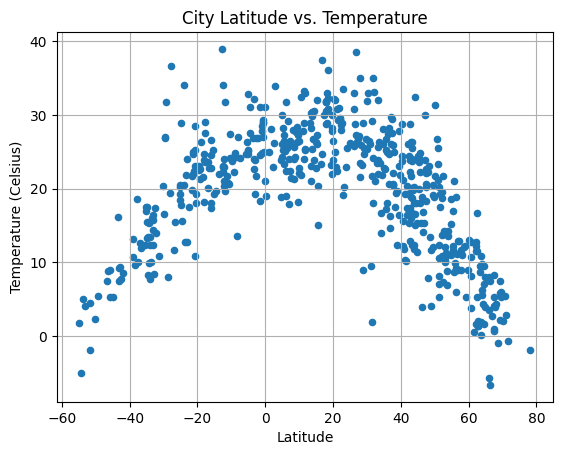

In [97]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp", title = "City Latitude vs. Temperature"\
                                           , xlabel = "Latitude", ylabel = "Temperature (Celsius)", grid = True)

# Incorporate the other graph properties

# Save the figure
plt.savefig("../outputdata/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

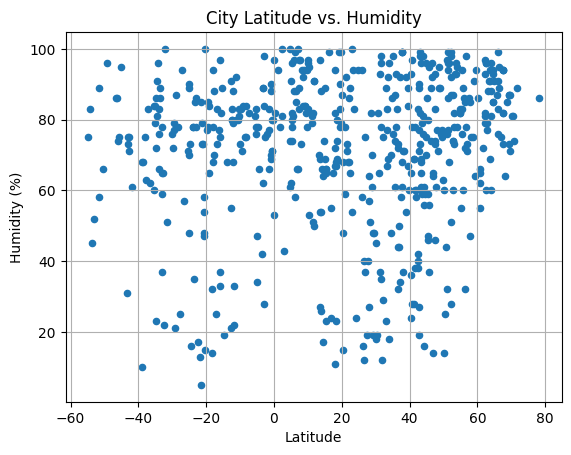

In [98]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat", "Humidity", title = "City Latitude vs. Humidity"\
                                           , xlabel = "Latitude", ylabel = "Humidity (%)", grid = True)

# Incorporate the other graph properties

# Save the figure
plt.savefig("../outputdata/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

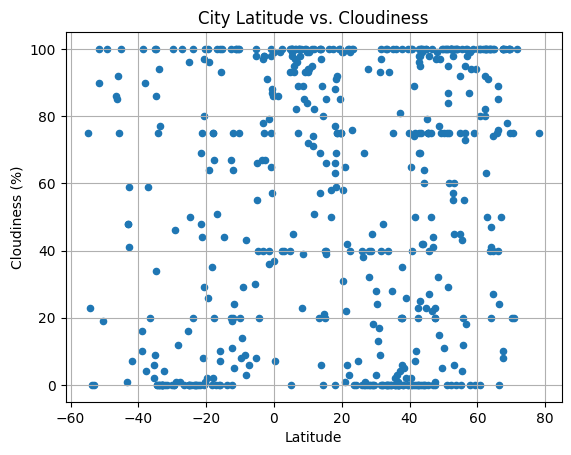

In [99]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat", "Cloudiness", title = "City Latitude vs. Cloudiness"\
                                           , xlabel = "Latitude", ylabel = "Cloudiness (%)", grid = True)

# Incorporate the other graph properties

# Save the figure
plt.savefig("../outputdata/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

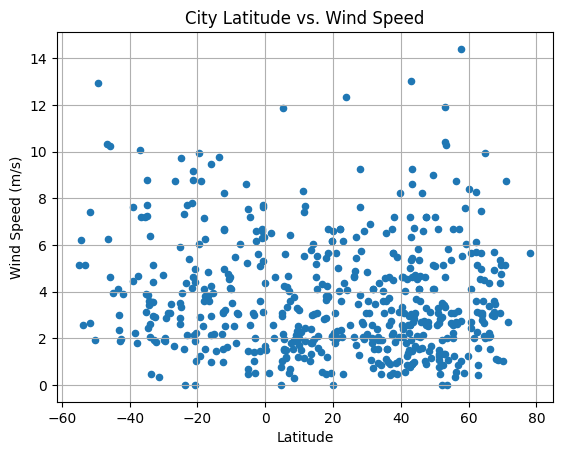

In [100]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat", "Wind Speed", title = "City Latitude vs. Wind Speed"\
                                           , xlabel = "Latitude", ylabel = "Wind Speed (m/s)", grid = True)

# Incorporate the other graph properties


# Save the figure
plt.savefig("../outputdata/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [101]:
# Define a function to create Linear Regression plots
def regNum(x, y):
    scipy.stats.linregress(x, y)


In [102]:
#x = city_data_df["Lat"].to_list()
#y = x

#regNum(x, y)

In [114]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

northLats = northern_hemi_df["Lat"].to_list()
xNorth = sorted(northLats)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,vila franca do campo,37.7172,-25.4335,20.49,99,100,4.49,PT,1694985172
6,hawaiian paradise park,19.5850,-154.9731,28.19,78,100,2.06,US,1694985173
7,albany,42.6512,-73.7550,22.29,71,75,2.57,US,1694985013
9,as sulayyil,20.4597,45.5744,31.99,15,58,3.09,SA,1694985021
12,nizao,18.2472,-70.2120,32.99,68,91,4.24,DO,1694985177


In [131]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0, :]

southLats = southern_hemi_df["Lat"].to_list()
xSouth = sorted(southLats)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-45.0322,168.6610,5.26,95,100,3.92,NZ,1694985168
1,tadine,-21.5483,167.8823,21.72,85,48,7.79,NC,1694985169
2,chonchi,-42.6240,-73.7724,7.79,71,59,1.98,CL,1694985170
3,benguela,-12.5790,13.4037,22.21,91,100,0.98,AO,1694985170
4,carnarvon,-24.8826,113.6576,17.85,73,50,9.72,AU,1694985171


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.759391
y = -0.36 x + 32.77 


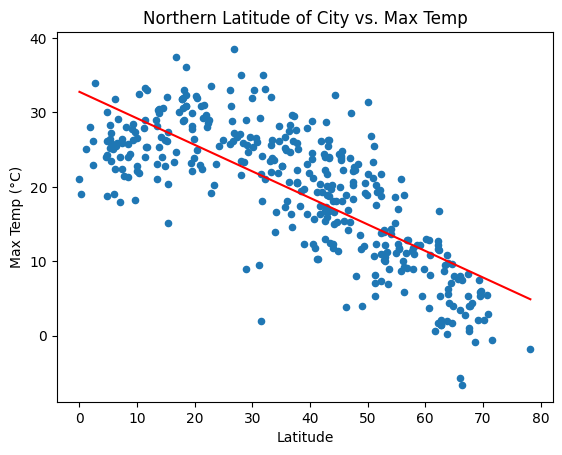

In [159]:
# Linear regression on Northern Hemisphere

corr = scipy.stats.linregress( northLats, northern_hemi_df["Max Temp"].to_list() )
print(f"The r-value is: {round(corr[2], 6)}")

y = np.array(xNorth) * corr[0] + corr[1]

## Regression Formula ##
print(f"y = {round(corr[0], 2)} x + {round(corr[1], 2)} ")

## Data ##
northern_hemi_df.plot.scatter("Lat", "Max Temp", title = "Northern Latitude of City vs. Max Temp",\
         xlabel = "Latitude", ylabel = "Max Temp (°C)")

## Regression Line ##
regLine = plt.plot(xNorth, y, color = "Red")


plt.show()


The r-value is: 0.799188
y = 0.44 x + 29.32 


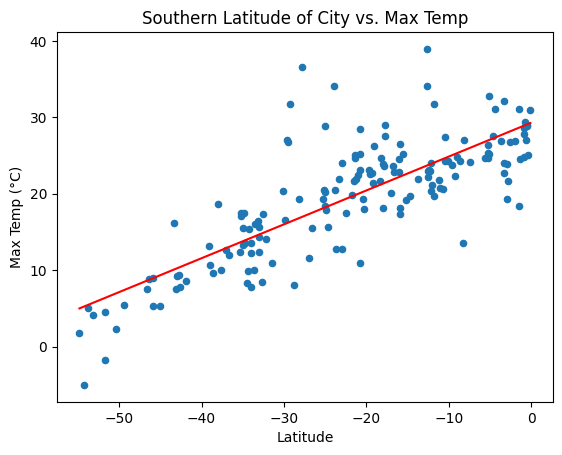

In [158]:
# Linear regression on Southern Hemisphere
corr = scipy.stats.linregress( southLats, southern_hemi_df["Max Temp"].to_list() )
print(f"The r-value is: {round(corr[2], 6)}")

y = np.array(xSouth) * corr[0] + corr[1]

## Regression Formula ##
print(f"y = {round(corr[0], 2)} x + {round(corr[1], 2)} ")

## Data ##
southern_hemi_df.plot.scatter("Lat", "Max Temp", title = "Southern Latitude of City vs. Max Temp",\
         xlabel = "Latitude", ylabel = "Max Temp (°C)")

## Regression Line ##
regLine = plt.plot(xSouth, y, color = "Red")


plt.show()


**Discussion about the linear relationship:** There appears to be a strong relationship in each plot. A better approach to plotting the graphs would be to instead look at ABSOLUTE Latitude (Latitude in degrees away from the equator), so they can be both plotted in one graph.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.093085
y = 0.11 x + 68.01 


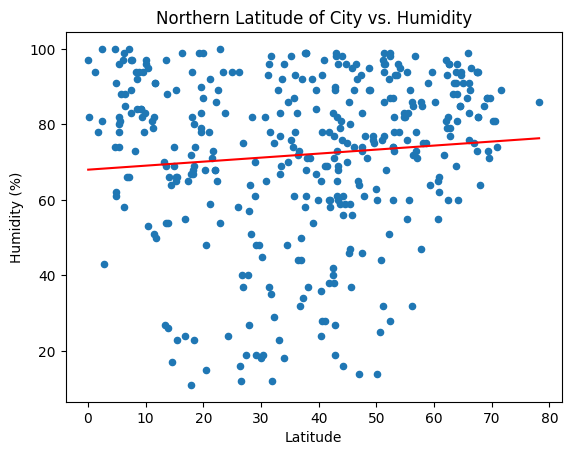

In [157]:
# Northern Hemisphere
corr = scipy.stats.linregress( northLats, northern_hemi_df["Humidity"].to_list() )
print(f"The r-value is: {round(corr[2], 6)}")

y = np.array(xNorth) * corr[0] + corr[1]

## Regression Formula ##
print(f"y = {round(corr[0], 2)} x + {round(corr[1], 2)} ")

## Data ##
northern_hemi_df.plot.scatter("Lat", "Humidity", title = "Northern Latitude of City vs. Humidity",\
         xlabel = "Latitude", ylabel = "Humidity (%)")

## Regression Line ##
regLine = plt.plot(xNorth, y, color = "Red")

plt.show()


The r-value is: 0.027612
y = 0.04 x + 69.31 


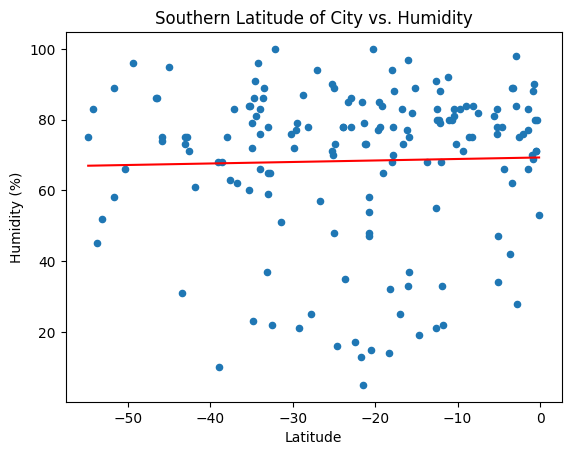

In [155]:
# Southern Hemisphere
corr = scipy.stats.linregress( southLats, southern_hemi_df["Humidity"].to_list() )
print(f"The r-value is: {round(corr[2], 6)}")

y = np.array(xSouth) * corr[0] + corr[1]

## Regression Formula ##
print(f"y = {round(corr[0], 2)} x + {round(corr[1], 2)} ")

## Data ##
southern_hemi_df.plot.scatter("Lat", "Humidity", title = "Southern Latitude of City vs. Humidity",\
         xlabel = "Latitude", ylabel = "Humidity (%)")

## Regression Line ##
regLine = plt.plot(xSouth, y, color = "Red")

plt.show()


**Discussion about the linear relationship:** Humidity does not appear to be influenced by Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.014585
y = -0.03 x + 59.64 


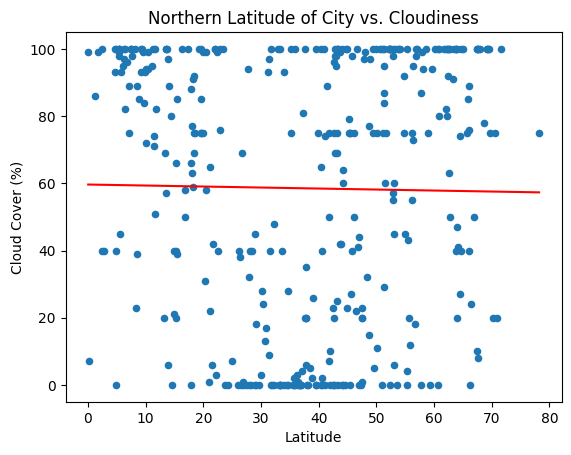

In [154]:
# Northern Hemisphere
corr = scipy.stats.linregress( northLats, northern_hemi_df["Cloudiness"].to_list() )
print(f"The r-value is: {round(corr[2], 6)}")

y = np.array(xNorth) * corr[0] + corr[1]

## Regression Formula ##
print(f"y = {round(corr[0], 2)} x + {round(corr[1], 2)} ")

## Data ##
northern_hemi_df.plot.scatter("Lat", "Cloudiness", title = "Northern Latitude of City vs. Cloudiness",\
         xlabel = "Latitude", ylabel = "Cloud Cover (%)")

## Regression Line ##
regLine = plt.plot(xNorth, y, color = "Red")

plt.show()


The r-value is: 0.158535
y = 0.43 x + 53.26 


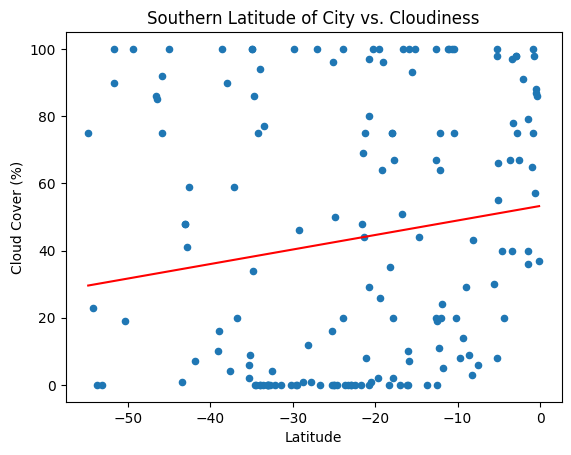

In [153]:
# Southern Hemisphere
corr = scipy.stats.linregress( southLats, southern_hemi_df["Cloudiness"].to_list() )
print(f"The r-value is: {round(corr[2], 6)}")

y = np.array(xSouth) * corr[0] + corr[1]

## Regression Formula ##
print(f"y = {round(corr[0], 2)} x + {round(corr[1], 2)} ")

## Data ##
southern_hemi_df.plot.scatter("Lat", "Cloudiness", title = "Southern Latitude of City vs. Cloudiness",\
         xlabel = "Latitude", ylabel = "Cloud Cover (%)")

## Regression Line ##
regLine = plt.plot(xSouth, y, color = "Red")

plt.show()


**Discussion about the linear relationship:** Cloud Cover does not appear to be influenced by Latitude. However, Cities are more likely to have either 0% or 100% Cloud Cover than a value in-between. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.101978
y = 0.01 x + 2.98 


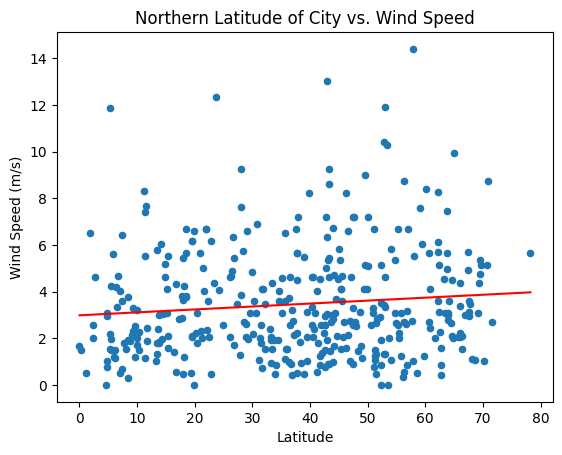

In [152]:
# Northern Hemisphere
corr = scipy.stats.linregress( northLats, northern_hemi_df["Wind Speed"].to_list() )
print(f"The r-value is: {round(corr[2], 6)}")

y = np.array(xNorth) * corr[0] + corr[1]

## Regression Formula ##
print(f"y = {round(corr[0], 2)} x + {round(corr[1], 2)} ")

## Data ##
northern_hemi_df.plot.scatter("Lat", "Wind Speed", title = "Northern Latitude of City vs. Wind Speed",\
         xlabel = "Latitude", ylabel = "Wind Speed (m/s)")

## Regression Line ##
regLine = plt.plot(xNorth, y, color = "Red")

plt.show()

The r-value is: -0.072568
y = -0.01 x + 4.01 


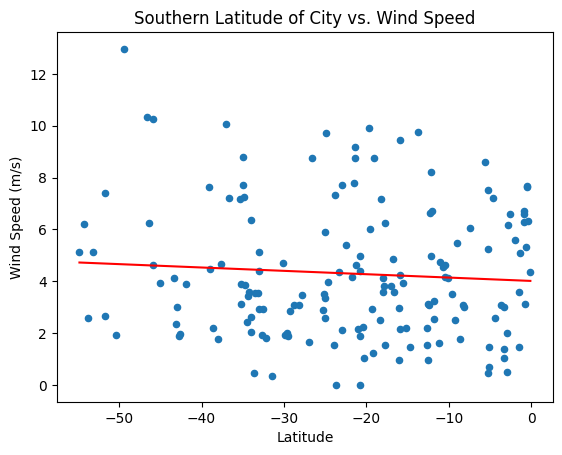

In [160]:
# Southern Hemisphere
corr = scipy.stats.linregress( southLats, southern_hemi_df["Wind Speed"].to_list() )
print(f"The r-value is: {round(corr[2], 6)}")

y = np.array(xSouth) * corr[0] + corr[1]

## Regression Formula ##
print(f"y = {round(corr[0], 2)} x + {round(corr[1], 2)} ")

## Data ##
southern_hemi_df.plot.scatter("Lat", "Wind Speed", title = "Southern Latitude of City vs. Wind Speed",\
         xlabel = "Latitude", ylabel = "Wind Speed (m/s)")

## Regression Line ##
regLine = plt.plot(xSouth, y, color = "Red")

plt.show()


**Discussion about the linear relationship:** There appears to be no influence on wind speed by latitude.